In [1]:
import domes

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 1. Spherical dome

In [3]:
dome = domes.Dome(nr_sides = 12,
                  nr_layers = 4,
                  radius = 10,
                  )

In [4]:
print(dome)


Dome 
    Nr of sides : 	12
    Nr of layers : 	4
    Side length : 	5.176380902050415
    Vert. side length : 3.9018064403225647
    Height : 		10
    Equator radius : 	10
    Vertical radius : 	10.0
        


In [5]:
# AXIS LIMITS
scale = 1.1
x_lim = scale * np.max(dome.faces[:,:,0])
y_lim = scale * np.max(dome.faces[:,:,1])
z_lim = scale * np.max(dome.faces[:,:,2])

/tmp/ipykernel_43616/3892306027.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


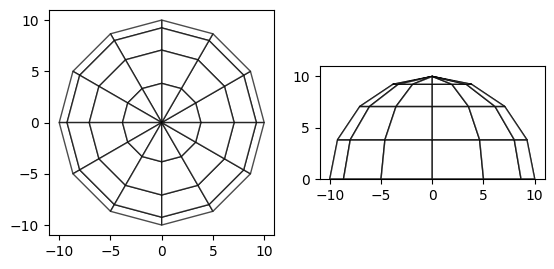

In [6]:
fig, axs = plt.subplots(1,2)

# TOP VIEW PROJECTION
poly = PolyCollection(dome.faces[:,:,:2], alpha=0.7)
poly.set_facecolor('white')
poly.set_edgecolor('black')

axs[0].add_collection(poly)

axs[0].set_xlim(-x_lim, x_lim)
axs[0].set_ylim(-y_lim, y_lim)
axs[0].set_aspect('equal')

# SIDE VIEW PROJECTION
poly = PolyCollection(dome.faces[:,:,0::2], alpha=0.7)
poly.set_facecolor('white')
poly.set_edgecolor('black')
axs[1].add_collection(poly)

axs[1].set_xlim(-x_lim, x_lim)
axs[1].set_ylim(0, z_lim)
axs[1].set_aspect('equal')

fig.show()

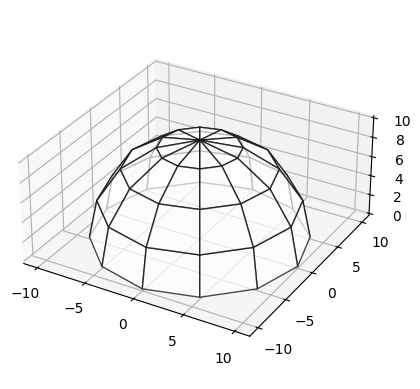

In [7]:
# 3D VIEW
ax = plt.figure().add_subplot(projection='3d')

poly = Poly3DCollection(dome.faces, alpha=0.7)
poly.set_facecolor('white')
poly.set_edgecolor('black')

ax.add_collection3d(poly)
ax.set_aspect('equal')
# ax.axis('off');

## 1.1 Animated

In [8]:
from tqdm import tqdm
import os

framedir = os.path.abspath(os.getcwd() + "/frames/")
if not os.path.isdir(framedir):
    os.makedirs(framedir)

frames = 20

# remove images from previous animation
for i in range(frames):
    try:
        os.remove(os.path.join(framedir, f'im_{i}.png'))
    except:
        continue

# rotate x steps until next point of symmetry
a = 2*np.pi/dome.NR_SIDES
t = np.arange(0, a, a/frames)
for i, angle in tqdm(list(enumerate(t))):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    dome.rotate_by_angle(angle) # this is where the object is rotated about the z-axis

    poly = Poly3DCollection(dome.faces, alpha=0.7)
    poly.set_facecolor('white')
    poly.set_edgecolor('black')

    ax.add_collection3d(poly)
    
    ax.set_xlim(-x_lim, x_lim)
    ax.set_ylim(-y_lim, y_lim)
    
    ax.set_aspect('equal')
    # ax.axis('off');
    
    plt.tight_layout()
    fig.savefig(os.path.join(framedir, f'im_{i}.png'))
    
    plt.close()

100%|██████████| 20/20 [00:10<00:00,  1.85it/s]


In [9]:
# Use pillow to collect all frames as an animation in a gif file
from PIL import Image

i = 0
images = []
while i < frames:
    try:
        images += [Image.open(os.path.join(framedir, f'im_{i}.png'))]
    except:
        break
    i += 1

images[0].save(os.path.join(os.getcwd(), 'rotating.gif'), 
               save_all=True, 
               append_images=images[1:], 
               duration=int(1e3/frames), 
               loop=0)

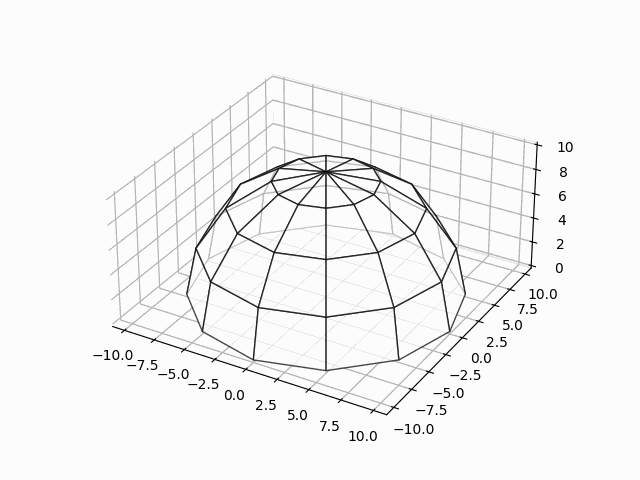

In [10]:
from IPython.display import Image
Image(filename=os.path.join(os.getcwd(), 'rotating.gif'))

# 1.2 Template for pieces (in 2D)

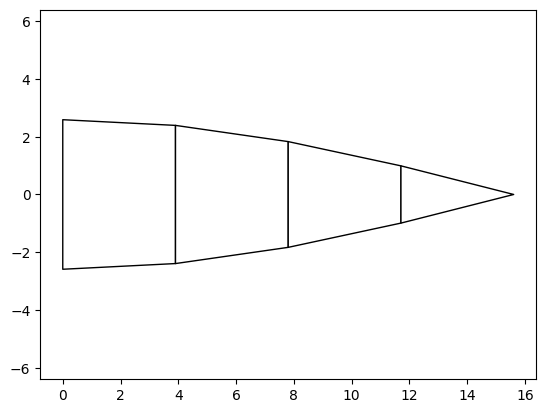

In [11]:
fig, ax = plt.subplots()

poly = PolyCollection(dome.pieces_template_2D())
poly.set_facecolors('white')
poly.set_edgecolors('black')

ax.add_collection(poly)
ax.axis('equal');

# 2. Non-spherical (non-specified vertical radius)

In [12]:
dome = domes.Dome(nr_sides = 12,
                  nr_layers = 4,
                  radius = 10,
                  height = 20
                  )

In [13]:
print(dome)


Dome 
    Nr of sides : 	12
    Nr of layers : 	4
    Side length : 	5.176380902050415
    Vert. side length : 5.782625974878307
    Height : 		20
    Equator radius : 	10
    Vertical radius : 	25.0
        


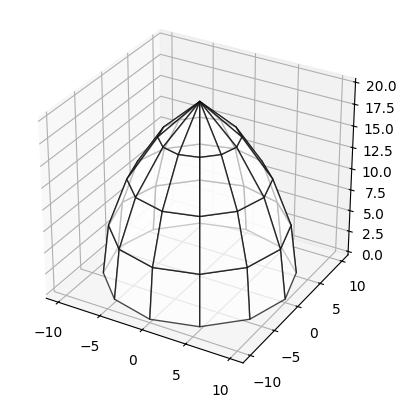

In [14]:
ax = plt.figure().add_subplot(projection='3d')

poly = Poly3DCollection(dome.faces, alpha=0.7)
poly.set_facecolor('white')
poly.set_edgecolor('black')

ax.add_collection3d(poly)
ax.set_aspect('equal')
# ax.axis('off');

# 3. Non-spherical (vertical radius given)

In [15]:
dome = domes.Dome(nr_sides = 12,
                  nr_layers = 4,
                  radius = 10,
                  height = 20,
                  vertical_radius = 15,
                  )

In [16]:
print(dome)


Dome 
    Nr of sides : 	12
    Nr of layers : 	4
    Side length : 	5.176380902050415
    Vert. side length : 6.261635718494443
    Height : 		20
    Equator radius : 	10
    Vertical radius : 	15
        


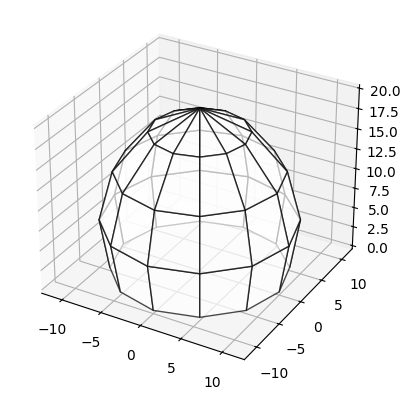

In [17]:
ax = plt.figure().add_subplot(projection='3d')

poly = Poly3DCollection(dome.faces, alpha=0.7)
poly.set_facecolor('white')
poly.set_edgecolor('black')

ax.add_collection3d(poly)
ax.set_aspect('equal')
# ax.axis('off');

In [18]:
dome = domes.Dome(nr_sides = 12,
                  nr_layers = 4,
                  radius = 10,
                  height = 20,
                  vertical_radius = 50,
                  )

In [19]:
print(dome)


Dome 
    Nr of sides : 	12
    Nr of layers : 	4
    Side length : 	5.176380902050415
    Vert. side length : 5.634848961508389
    Height : 		20
    Equator radius : 	10
    Vertical radius : 	50
        


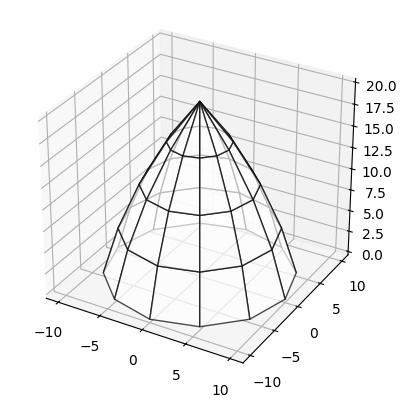

In [20]:
ax = plt.figure().add_subplot(projection='3d')

poly = Poly3DCollection(dome.faces, alpha=0.7)
poly.set_facecolor('white')
poly.set_edgecolor('black')

ax.add_collection3d(poly)
ax.set_aspect('equal')
# ax.axis('off');

## 3.1 Animated

In [21]:
from tqdm import tqdm
import os

framedir = os.path.abspath(os.getcwd() + "/frames_2/")
if not os.path.isdir(framedir):
    os.makedirs(framedir)

frames = 20

# remove images from previous animation
for i in range(frames):
    try:
        os.remove(os.path.join(framedir, f'im_{i}.png'))
    except:
        continue

# increase and decrease radius in steps
r_min = 15
r_max = 50
r = np.linspace(r_min, r_max, int(frames/2))
r = np.concat((r, np.flip(r)))

for i, rad in tqdm(list(enumerate(r))):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    dome = domes.Dome(nr_sides = 12,
                  nr_layers = 4,
                  radius = 10,
                  height = 20,
                  vertical_radius = rad,
                  )


    poly = Poly3DCollection(dome.faces, alpha=0.7)
    poly.set_facecolor('white')
    poly.set_edgecolor('black')

    ax.add_collection3d(poly)
    ax.set_aspect('equal')
    ax.axis('off');
    
    plt.tight_layout()
    fig.savefig(os.path.join(framedir, f'im_{i}.png'))
    
    plt.close()

100%|██████████| 20/20 [00:03<00:00,  5.62it/s]


In [22]:
# Use pillow to collect all frames as an animation in a gif file
from PIL import Image

i = 0
images = []
while i < frames:
    try:
        images += [Image.open(os.path.join(framedir, f'im_{i}.png'))]
    except:
        break
    i += 1

images[0].save(os.path.join(os.getcwd(), 'expanding.gif'), 
               save_all=True, 
               append_images=images[1:], 
               duration=int(1e3/frames), 
               loop=0)

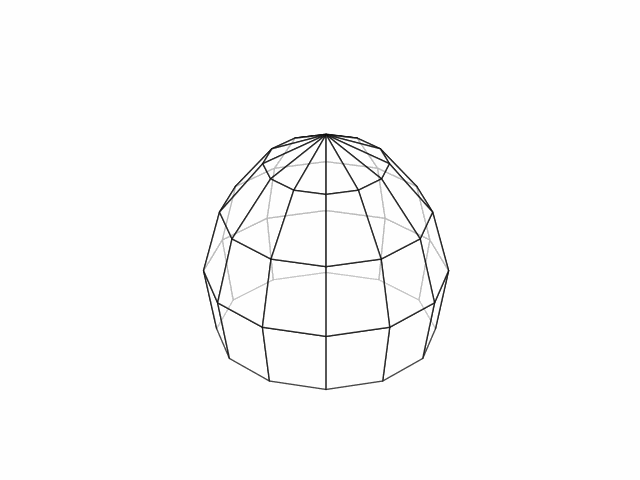

In [23]:
from IPython.display import Image
Image(filename=os.path.join(os.getcwd(), 'expanding.gif'))